In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
df = DataReader('BA', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,210.199997,202.490005,210.000000,202.720001,21225600,202.720001
2021-01-05,213.350006,204.600006,204.740005,211.630005,19338300,211.630005
2021-01-06,215.610001,209.339996,210.220001,211.029999,16202200,211.029999
2021-01-07,216.600006,211.779999,213.389999,212.710007,14474100,212.710007
2021-01-08,214.100006,208.160004,213.610001,209.899994,14144000,209.899994
...,...,...,...,...,...,...
2022-03-29,196.360001,191.199997,191.619995,193.800003,8438700,193.800003
2022-03-30,197.449997,191.360001,192.320007,194.910004,9959300,194.910004
2022-03-31,197.580002,191.449997,195.000000,191.500000,6447900,191.500000


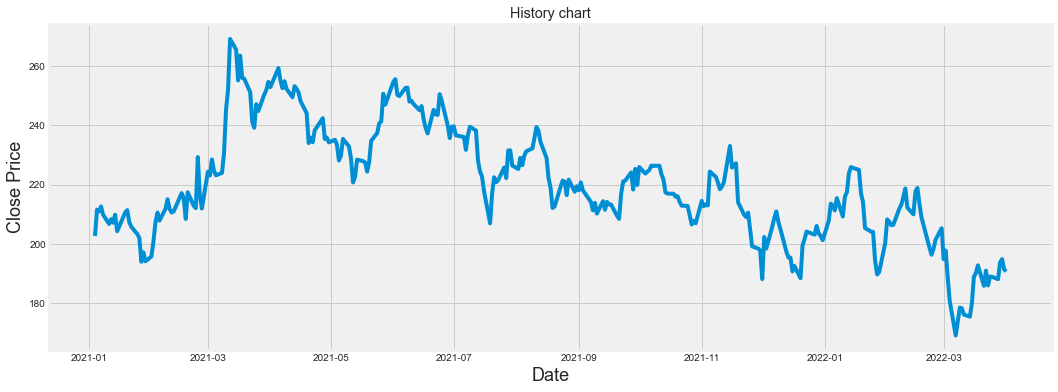

In [3]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.33543293],
       [0.42451515],
       [0.41851628],
       [0.435313  ],
       [0.4072185 ],
       [0.37612471],
       [0.39232157],
       [0.380324  ],
       [0.40731857],
       [0.35142979],
       [0.415317  ],
       [0.42271543],
       [0.38232357],
       [0.36662664],
       [0.34183164],
       [0.32883421],
       [0.24855029],
       [0.28054385],
       [0.25015   ],
       [0.26664664],
       [0.3176365 ],
       [0.38212357],
       [0.41461707],
       [0.38752242],
       [0.42771443],
       [0.45940807],
       [0.4274145 ],
       [0.41481707],
       [0.41801635],
       [0.48000392],
       [0.46340736],
       [0.39302135],
       [0.48290343],
       [0.43701265],
       [0.42941407],
       [0.60157964],
       [0.47270543],
       [0.42831428],
       [0.55208957],
       [0.53959207],
       [0.59378121],
       [0.555289  ],
       [0.54039193],
       [0.54849028],
       [0.61427714],
       [0.76154764],
       [0.82813436],
       [1.   

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.33543293, 0.42451515, 0.41851628, 0.435313  , 0.4072185 ,
       0.37612471, 0.39232157, 0.380324  , 0.40731857, 0.35142979,
       0.415317  , 0.42271543, 0.38232357, 0.36662664, 0.34183164,
       0.32883421, 0.24855029, 0.28054385, 0.25015   , 0.26664664,
       0.3176365 , 0.38212357, 0.41461707, 0.38752242, 0.42771443,
       0.45940807, 0.4274145 , 0.41481707, 0.41801635, 0.48000392,
       0.46340736, 0.39302135, 0.48290343, 0.43701265, 0.42941407,
       0.60157964, 0.47270543, 0.42831428, 0.55208957, 0.53959207,
       0.59378121, 0.555289  , 0.54039193, 0.54849028, 0.61427714,
       0.76154764, 0.82813436, 1.        , 0.96440714, 0.860228  ,
       0.94401114, 0.86872621, 0.86632679, 0.82043585, 0.72065586,
       0.70055993, 0.780044  , 0.75684857, 0.81333736, 0.82823428])]
[0.8553289281883458]

[array([0.33543293, 0.42451515, 0.41851628, 0.435313  , 0.4072185 ,
       0.37612471, 0.39232157, 0.380324  , 0.40731857, 0.35142979,
       0.415317  , 0.42271543, 0.382

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 3s 138ms/step - loss: 0.2700
Epoch 2/256
2/2 [==============================] - 0s 131ms/step - loss: 0.0451
Epoch 3/256
2/2 [==============================] - 0s 131ms/step - loss: 0.0556
Epoch 4/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0272
Epoch 5/256
2/2 [==============================] - 0s 136ms/step - loss: 0.0145
Epoch 6/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0253
Epoch 7/256
2/2 [==============================] - 0s 129ms/step - loss: 0.0269
Epoch 8/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0187
Epoch 9/256
2/2 [==============================] - 0s 127ms/step - loss: 0.0122
Epoch 10/256
2/2 [==============================] - 0s 132ms/step - loss: 0.0123
Epoch 11/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0161
Epoch 12/256
2/2 [==============================] - 0s 131ms/step - loss: 0.0150
Epoch 13/256
2/2 [===================

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.298030700090933

C:\Users\ASUS\AppData\Local\Temp/ipykernel_4672/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


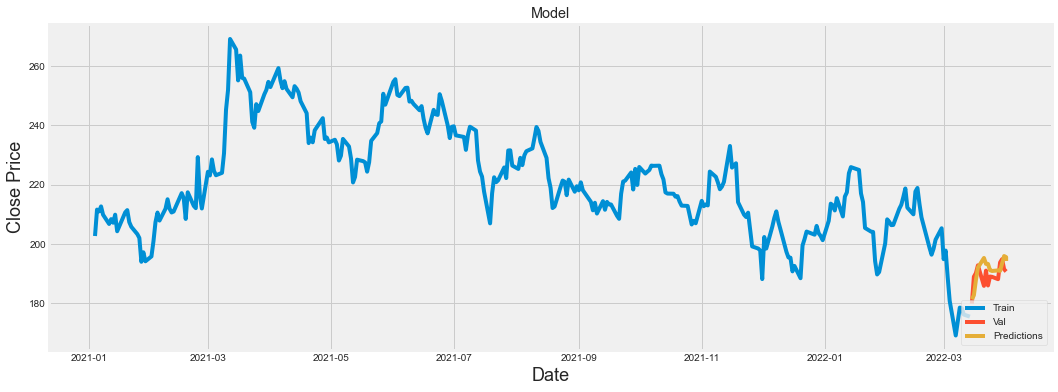

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,179.889999,181.374710
2022-03-16,188.990005,182.736725
2022-03-17,190.190002,187.845612
2022-03-18,192.830002,192.057907
2022-03-21,185.899994,195.311172
2022-03-22,191.039993,193.317688
2022-03-23,186.039993,193.311523
2022-03-24,189.050003,191.172729
2022-03-25,188.949997,190.924622
